# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**План выполнения проекта**

1. Загрузите и изучите данные.
2. Ответьте на вопрос и обоснуйте решение. 
   Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
  - a. Изменится. Приведите примеры матриц.
  - b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
4. Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-исследование-данных" data-toc-modified-id="Загрузка-и-исследование-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и исследование данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследование" data-toc-modified-id="Исследование-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Исследование</a></span></li><li><span><a href="#Визуализация-данных" data-toc-modified-id="Визуализация-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Визуализация данных</a></span></li><li><span><a href="#Промежуточные-вывод" data-toc-modified-id="Промежуточные-вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Промежуточные вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Ответ-на-вопрос" data-toc-modified-id="Ответ-на-вопрос-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ответ на вопрос</a></span></li><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обоснование</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Алгоритм" data-toc-modified-id="Алгоритм-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Алгоритм</a></span></li><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обоснование</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Без-преобразования" data-toc-modified-id="Без-преобразования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Без преобразования</a></span></li><li><span><a href="#С-преобразованием" data-toc-modified-id="С-преобразованием-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>С преобразованием</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Загрузка и исследование данных

### Загрузка данных

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
    
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

### Исследование

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
def show_rows(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())
    print('Количество пропусков в каждом столбце')    
    print(data_frame.isna().mean())

In [6]:
show_rows(data)

Уникальные значения столбца Пол
[1 0]
Уникальные значения столбца Возраст
[41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]
Уникальные значения столбца Зарплата
[49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 33300. 31100. 31500. 42100. 37300. 42500. 27300. 46800. 33500. 44300.
 41600. 53900. 40100. 44600. 45000. 32000. 38200. 33000. 38500

Изменим тип данных в столбцах Возраст и Зарплата на целочисленный ввиду отсуствия дробных частей. Так же уменьшим обращение к памяти для остальных столбцов.

In [7]:
data['Пол'] = pd.to_numeric(data['Пол'], downcast='integer')
data['Возраст'] = pd.to_numeric(data['Возраст'], downcast='integer')
data['Зарплата'] = pd.to_numeric(data['Зарплата'], downcast='integer')
data['Члены семьи'] = pd.to_numeric(data['Члены семьи'], downcast='integer')
data['Страховые выплаты'] = pd.to_numeric(data['Страховые выплаты'], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int8   
 1   Возраст            5000 non-null   int8   
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int8   
 4   Страховые выплаты  5000 non-null   int8   
dtypes: float64(1), int8(4)
memory usage: 58.7 KB


### Визуализация данных

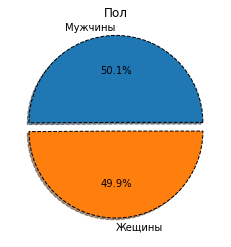

In [56]:
genders = data.groupby(['Пол']).count()
vals = [genders.iloc[0,0], genders.iloc[1,0]]
labels =['Мужчины','Жещины']
explode = [0.1,0]
plt.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True,
explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'})
plt.title('Пол')
plt.show()

Женщин и мужчин поровну.

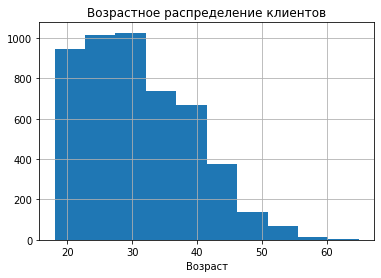

In [73]:
data['Возраст'].hist()
plt.title('Возрастное распределение клиентов')
plt.xlabel('Возраст')
#plt.ylabel('Клиентов')
plt.show()

Большая часть клиентов - это люди до 40 лет.

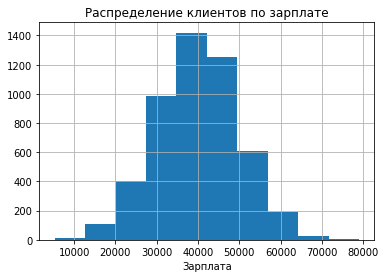

In [78]:
data['Зарплата'].hist()
plt.title('Распределение клиентов по зарплате')
plt.xlabel('Зарплата')
#plt.ylabel('Клиентов')
plt.show()

Зарплаты клиентов имеют нормальное распределение.

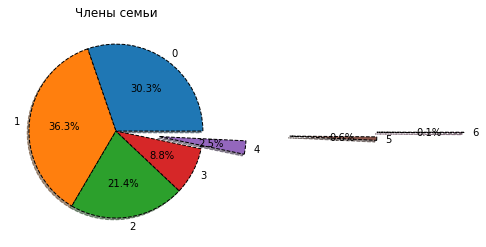

In [76]:
family = data.groupby(['Члены семьи']).count()
vals = [family.iloc[0,0], family.iloc[1,0], family.iloc[2,0], family.iloc[3,0], family.iloc[4,0], family.iloc[5,0], family.iloc[6,0]]
labels =['0','1', '2','3','4','5','6']
explode = [0] * 4 + [0.5] + [2] + [3]
plt.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True,
explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'})
plt.title('Члены семьи')
plt.show()

Большая часть клиентов имеет до 3 членов семьи.

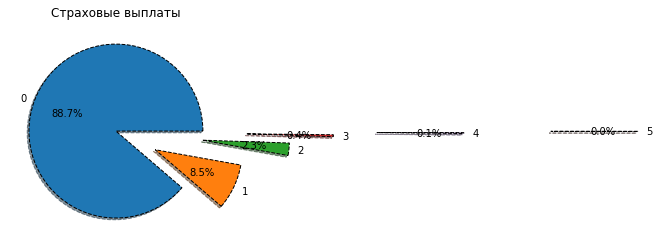

In [63]:
payments = data.groupby(['Страховые выплаты']).count()
vals = [payments.iloc[0,0], payments.iloc[1,0], payments.iloc[2,0], payments.iloc[3,0], payments.iloc[4,0], payments.iloc[5,0]]
labels =['0','1', '2','3','4','5']
explode = [0, 0.5, 1,1.5 ,3,5]
plt.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True,
explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'})
plt.title('Страховые выплаты')
plt.show()

Большая часть клиентов обходятся вообще без выплат.

Посмотрим, как зависят выплаты от других данных.

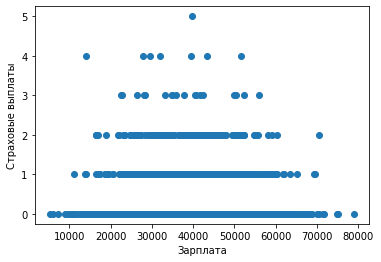

In [24]:
plt.scatter(data['Зарплата'], data['Страховые выплаты'])
plt.xlabel('Зарплата')
plt.ylabel('Страховые выплаты')
plt.show()

Строгой линейной зависимости междк выплатами и зарплатами нет.

Text(0, 0.5, 'Страховые выплаты')

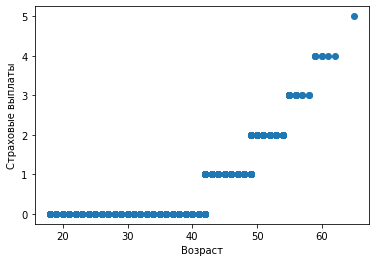

In [23]:
plt.scatter(data['Возраст'], data['Страховые выплаты'])
plt.xlabel('Возраст')
plt.ylabel('Страховые выплаты')
plt.show()

Чем старше человек, тем больше выплат. После сорока особенно.

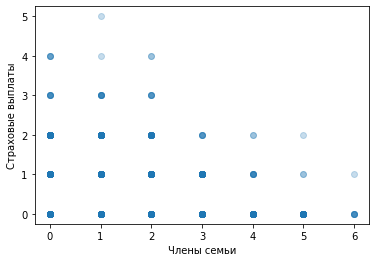

In [26]:
plt.scatter(data['Члены семьи'], data['Страховые выплаты'], alpha=0.25)
plt.xlabel('Члены семьи')
plt.ylabel('Страховые выплаты')
plt.show()

Строгой зависимости нет.

### Промежуточные вывод

Данные загружены и не имеют пропусков и аномалий. Приведение типов позволит более быстро обращаться к данным.

## Умножение матриц

**Описание данных**

Набор данных находится в файле /datasets/insurance.csv. Скачать датасет.
- **Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак**: количество страховых выплат клиенту за последние 5 лет.

In [8]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Убедимся в том, что линейня регрессия из scikit-learn вычисляет значения по формуле.

Модель линейной регрессии.

In [9]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
y = target
w = np.linalg.inv(X.T @ X) @ X.T @ y
display(w[1:])
model = LinearRegression()
model.fit(features, target)
model.coef_

array([ 7.92580543e-03,  3.57083050e-02, -1.70080492e-07, -1.35676623e-02])

array([ 7.92580543e-03,  3.57083050e-02, -1.70080492e-07, -1.35676623e-02])

Коэфициенты регрессии совпадают на 100%. Теперь перейдем к теоретической части.

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Ответ на вопрос

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** Качество регрессии не изменится.

Изначально:

$$
a = Xw \qquad (2.0)
$$

Заменим матрицу $X$ на матрицу $Z$:

$$
Z = XP \qquad (2.1)
$$

где $P$ - обратимая матрица с некими значениями, на которую может быть умножена матрица $X$.

### Обоснование

Заменим $X$ на $Z$ и вычислим, чему будет равено предсказание и вектор весов.

$$
a_1 = Zw_1 \qquad (2.2)
$$

$$
w_1 = (Z^T Z)^{-1} Z^T y \qquad (2.3)
$$

Подставим уравнение 2.2 правую часть уравнения 2.3 и получим следущее:

$$
a_1 = Z (Z^T Z)^{-1} Z^T y \qquad (2.4)
$$

Заменим все $Z$ правой частью уравнения 2.1:

$$
a_1 = XP ((XP)^T (XP))^{-1} (XP)^T y \qquad (2.5)
$$

Для следующего шага понадобится следующее свойсво обратной матрицы:

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

Раскроем $((XP)^T (XP))^{-1}$ в два шага:

$$
a_1 = XP ((XP)^T (XP))^{-1} (XP)^T y =
$$

$$
= XP(XP)^{-1}((XP)^T)^{-1} (XP)^T y = \qquad (2.6)
$$

$$
= XPP^{-1}X^{-1}((XP)^T)^{-1} (XP)^T y  
$$

Умножение приведет к $PP^{-1} = E$. Для следуюзего этапа воспользуемся свойством транспорнированной матрицы:

$$
(AB)^T = B^T A^T
$$

Умножение на единичную матрицу ничего не меняет. Раскроем $((XP)^T)^{-1} (XP)^T$ в три шага:

$$
a_1 = XEX^{-1}((XP)^T)^{-1} (XP)^T y = 
$$

$$
= XX^{-1}(P^T X^T)^{-1} P^T X^T y = \qquad (2.7)
$$

$$
= XX^{-1} (X^T)^{-1} (P^T)^{-1}  P^T X^T y
$$

Умножение приведет к $(P^T)^{-1}  P^T = E$. Посмотрим, что осталось от уравнения 2.7:

$$
a_1 = XX^{-1} (X^T)^{-1} E X^T y = 
$$

$$
= X(X^T X)^{-1} X^T y \qquad (2.8)
$$

Не сложно заметить, что произведение $(X^T X)^{-1} X^T$ равно $w$, тогда:

$$
Xw = a  
$$

Как видно, значение предсказания $a$ не меняется, если умножать матрицу признаков на обратимую матрицу.

Таким образом, мы доказали, что (2.0) равно (2.8):
$$
a_1 = a
$$

Что и требовалось доказать.

Попробуем так.

1. Для обоснования ответа получим предсказания для домноженных признаков. Пусть наши признаки будут как в исходном датасете размерностью 5000 на 4, а матрица для домножения 4 на 4. Умноженная матрица будет иметь вид X * P. Тогда фомула предсказаний примет следующий вид:

$$a' = XPw'$$

2. Подставим в формулу предсказаний формулу обучения для матрицы X P:

$$a' = XP((XP)^T XP)^{-1}(XP)^Ty$$

Воспользуемся следующими свойствами матриц:


$$(A B)^{-1} =B^{-1} A^{-1}$$

$$(A B)^{T} =B^{T} A^{T}$$

$$A A^{-1}=E$$

$$A E=E A=A$$

3. Раскроем скобки с транспонированием матриц, получится следующее уравнение:

$$a' = XP(P^T X^T XP)^{-1}P^T X^Ty$$

Внутри скобок, от множителей которых берется обратная матрица остались следующие матрицы: $P^T$ размером 4х4, $X^T$ размером 4х5000, $X$ размером 5000x4, $P$ размером 4x4. Одно из дополнительных свойств матриц, о котором следует помнить слудующее $ A(BC) = (AB)C$. Оно позволяет группировать матрицы внутри произведения различным образом. Т.к. обратная матрица может браться только от квадратной матрицы, то для раскрытия скобок данного произведения нам надо сгруппировать его множители так, чтобы они были квадратными матрицами.

4. Выделим 2 множителя произведения $P^T X^T X$ и $P$ и раскроем скобки:

$$a' = X P P^{-1} (P^T X^T X)^{-1} P^T X^Ty$$

5. Выделим внутри оставшихся скобок множители $P^T$ и $X^T X$ и раскроем скобки:

$$a' = X P P^{-1} (X^T X)^{-1}(P^T)^{-1} P^T X^Ty$$

6. Произведения $P P^{-1}$ и $(P^T)^{-1} P^T$ дают единичные матрицы, которые можно исключить из уровнения. С учетом этого формула принимает вид:

$$a' = X (X^T X)^{-1} X^Ty$$

Не сложно заметить, что произведение $(X^T X)^{-1} X^Ty$ равно $w$, тогда:

$$a' = X w$$

$$a = X w$$

Следовательно,

$$a' = a$$

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
.....
$$

### Промежуточный вывод

Качество линейной регресии не изменилось от использования исодной матрици и исходной матрицы, умноженную на обратимую.

## Алгоритм преобразования

Предложите алгоритм преобразования данных для решения задачи.
Обоснуйте, почему качество линейной регрессии не поменяется.

### Алгоритм

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу $Y$, которая будет генерироваться случайным образом.

Этапы алгоритма:
1. Составление матрицы $Y$.
2. Проверка матрицы на обратимость. Вычисление детерминанта матрицы $Y$.
3. Получение матрицы преобразованных признаков $Z = XY$.
4. Применение алгоритма на преобразованных признаках $Z$.

### Обоснование

Матрица $Y$ должна иметь необходимую размерность $(nxn)$, где n - количество признаков для регрессии.
Таким образом матрица $Z$ будет иметь туже размерность, что и матрица $X$. Обратная матрица $Y$ существует только для квадратных невырожденных матриц (определитель которых не равен нулю).

Пример:

$
X = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
4 & 5  
\end{pmatrix}
\qquad 
Y = \begin{pmatrix}
1 & 0 \\
2 & 3 \\  
\end{pmatrix}
\qquad det  Y = 3 $

Найдем значние Z:

$
Z = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
4 & 5  
\end{pmatrix} \begin{pmatrix}
1 & 0 \\
2 & 3 \\  
\end{pmatrix} = \begin{pmatrix}
1*1+2*2 & 1*0+2*3  \\
2*1+3*2 & 2*0+3*3  \\
4*1+5*2 & 4*0+5*3   
\end{pmatrix} = \begin{pmatrix}
5 & 6 \\
8 & 9 \\
14 & 15  
\end{pmatrix}$

После этого добавляем нулевой столбец и вводим данные в линейную регрессию.

### Промежуточный вывод

Создан алгоритм преобразования данных.

## Проверка алгоритма

Проведем исследование модели по двум направлениям:
1. Исследуем качество модели без преобразования.
         1.1 С исходными признаками
         1.2 С отмасштабированными признаками
2. Исследуем качество модели с преобразованием.
         2.1 С исходными признаками
         2.2 С отмасштабированными признаками

Разделим данные на обучающие и тестовые.

In [10]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

### Без преобразования

In [11]:
model = LinearRegression()
model.fit(features_train, target_train)
R2_LR_origin_data = r2_score(target_test, model.predict(features_test))
print("w-vector coef",model.coef_)
print("R2 =", R2_LR_origin_data)

w-vector coef [ 1.79258369e-02  3.57228278e-02 -5.46000708e-07 -1.26186590e-02]
R2 = 0.43522757127026546


In [12]:
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
pipeline.fit(features_train, target_train)
R2_LR_origin_data_scaled = r2_score(target_test, pipeline.predict(features_test))
#print("w-vector coef",pipeline.coef_) при использовании pipeline невозможно получить коэффициенты регрессии
print("R2 =", R2_LR_origin_data_scaled)

R2 = 0.4352275712702668


Модель ведет себя одинаково как на исходных данных, так и на отмасштабированных. Колебания 15 знака и дальше после запятой связано с точностью хранения дробных чисел в python 3.

### С преобразованием

Создадим функцию преобразования матрицы признаков.

In [13]:
def cipher_features(features):
    crypted_features = features
    n = features.shape[1]
    np.random.seed(12345)
    cipher_matrix = np.random.randint(1, 10, (n,n))
    det = np.linalg.det(cipher_matrix)
    while det == 0:
        np.random.seed(12345)
        cipher_matrix = np.random.randint(1, 10, (n,n))
        det = np.linalg.det(cipher_matrix)
    crypted_features = crypted_features @ cipher_matrix
    return crypted_features, cipher_matrix

Выведем данные до преобразования и после.

In [14]:
display(features.head())
features, cipher_matrix = cipher_features(features)
display(features.head())
cipher_matrix

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


,0,1,2,3
0,99452.0,396931.0,347287.0,49899.0
1,76279.0,304140.0,266095.0,38329.0
2,42174.0,168087.0,147058.0,21203.0
3,83532.0,333667.0,291948.0,41861.0
4,52371.0,208890.0,182758.0,26301.0


array([[3, 6, 2, 5],
       [6, 3, 2, 7],
       [2, 8, 7, 1],
       [3, 2, 3, 7]])

Как видно, данные потеряли свои оригинальные значения, теперь в них хранится непонятное число. Разобьем данные на тренировочную и обучающую выборку и проверим R2 значение.

In [15]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [16]:
model = LinearRegression()
model.fit(features_train, target_train)
R2_LR_cipher_data = r2_score(target_test, model.predict(features_test))
print("w-vector coef",model.coef_)
print("R2 =", R2_LR_cipher_data)

w-vector coef [ 0.01280453  0.00328449 -0.00664342 -0.00538157]
R2 = 0.43522757127030764


In [17]:
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
pipeline.fit(features_train, target_train)
R2_LR_cipher_data_scaled = r2_score(target_test, pipeline.predict(features_test))
#print("w-vector coef",pipeline.coef_) при использовании pipeline невозможно получить коэффициенты регрессии
print("R2 =", R2_LR_cipher_data_scaled)

R2 = 0.43522757127026535


Сравним показатели качества моделей.

In [18]:
result = pd.DataFrame(data= [R2_LR_origin_data,
                      R2_LR_origin_data_scaled,
                      R2_LR_cipher_data,
                      R2_LR_cipher_data_scaled], 
                     columns=['R2'], 
                     index=['Линейная регрессия',
                            'Линейная регрессия c масштабом',
                            'Линейная регрессия на преобразованных признаках',
                            'Линейная регрессия на преобразованных признаках c масштабом',])
result

,R2
Линейная регрессия,0.435228
Линейная регрессия c масштабом,0.435228
Линейная регрессия на преобразованных признаках,0.435228
Линейная регрессия на преобразованных признаках c масштабом,0.435228


### Промежуточный вывод

Исследован алгоритм преобразования данных и проверена метрика R2 для данных без преобразования и с ним.

## Итоговый вывод

В ходе работы было проделано:

1. Загружены и изучены данные.
2. Качество линейной регресии не изменилось от использования исодной матрици и исходной матрицы, умноженную на обратимую.
3. Создан алгоритм преобразования данных.
4. Исследован алгоритм преобразования данных и проверена метрика R2 для данных без преобразования и с ним.

По результатам работы использования матричных операций можно увидеть, что данные очень просто зашифровать от распознования, имея правильную матрицу.